In [1]:
# import libraries to load data
import os
import pandas as pd

# load and preview test/train files
train_file = "./trainingdata.txt" 
test_file = "./testdata.txt" 
df_train = pd.read_csv(train_file,sep='\t')
df_test = pd.read_csv(test_file,sep='\t')

## preview files to make sure data is loaded properly
# df_train.head()
# df_test.head()

#### Preliminary observation of data to look for obvious anomaly
* `.info()` and `.describe()` to look at scale and range
* `boxplot` to look at outliers

In [2]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36169 entries, 0 to 36168
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        36169 non-null  int64 
 1   job        36169 non-null  object
 2   marital    36169 non-null  object
 3   education  36169 non-null  object
 4   default    36169 non-null  object
 5   balance    36169 non-null  int64 
 6   housing    36169 non-null  object
 7   loan       36169 non-null  object
 8   contact    36169 non-null  object
 9   day        36169 non-null  int64 
 10  month      36169 non-null  object
 11  duration   36169 non-null  int64 
 12  campaign   36169 non-null  int64 
 13  pdays      36169 non-null  int64 
 14  previous   36169 non-null  int64 
 15  poutcome   36169 non-null  object
 16  y          36169 non-null  object
dtypes: int64(7), object(10)
memory usage: 4.7+ MB


In [3]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9042 entries, 0 to 9041
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        9042 non-null   int64 
 1   job        9042 non-null   object
 2   marital    9042 non-null   object
 3   education  9042 non-null   object
 4   default    9042 non-null   object
 5   balance    9042 non-null   int64 
 6   housing    9042 non-null   object
 7   loan       9042 non-null   object
 8   contact    9042 non-null   object
 9   day        9042 non-null   int64 
 10  month      9042 non-null   object
 11  duration   9042 non-null   int64 
 12  campaign   9042 non-null   int64 
 13  pdays      9042 non-null   int64 
 14  previous   9042 non-null   int64 
 15  poutcome   9042 non-null   object
 16  y          9042 non-null   object
dtypes: int64(7), object(10)
memory usage: 1.2+ MB


In [4]:
df_train.describe()

,age,balance,day,duration,campaign,pdays,previous
count,36169.00000,36169.000000,36169.000000,36169.000000,36169.000000,36169.0000,36169.000000
mean,41.29705,1444.091653,15.517156,243.389367,2.801017,50.4970,0.725400
std,10.89822,3168.706522,8.251848,238.629725,3.150588,109.5528,2.554811
min,18.00000,-8019.000000,1.000000,0.000000,1.000000,-1.0000,0.000000
25%,33.00000,82.000000,8.000000,99.000000,1.000000,-1.0000,0.000000
50%,39.00000,485.000000,16.000000,173.000000,2.000000,-1.0000,0.000000
75%,49.00000,1533.000000,21.000000,304.000000,3.000000,-1.0000,0.000000
max,95.00000,102127.000000,31.000000,4918.000000,58.000000,871.0000,275.000000


In [5]:
df_test.describe()

,age,balance,day,duration,campaign,pdays,previous
count,9042.000000,9042.000000,9042.000000,9042.000000,9042.000000,9042.0,9042.0
mean,39.492811,1034.984627,16.963504,317.259566,2.615129,-1.0,0.0
std,9.279604,2461.090197,8.501794,315.391534,2.873521,0.0,0.0
min,20.000000,-3372.000000,1.000000,0.000000,1.000000,-1.0,0.0
25%,32.000000,42.000000,9.000000,124.000000,1.000000,-1.0,0.0
50%,38.000000,335.000000,16.000000,210.000000,2.000000,-1.0,0.0
75%,46.000000,1071.750000,26.000000,389.000000,3.000000,-1.0,0.0
max,61.000000,58544.000000,31.000000,3881.000000,63.000000,-1.0,0.0


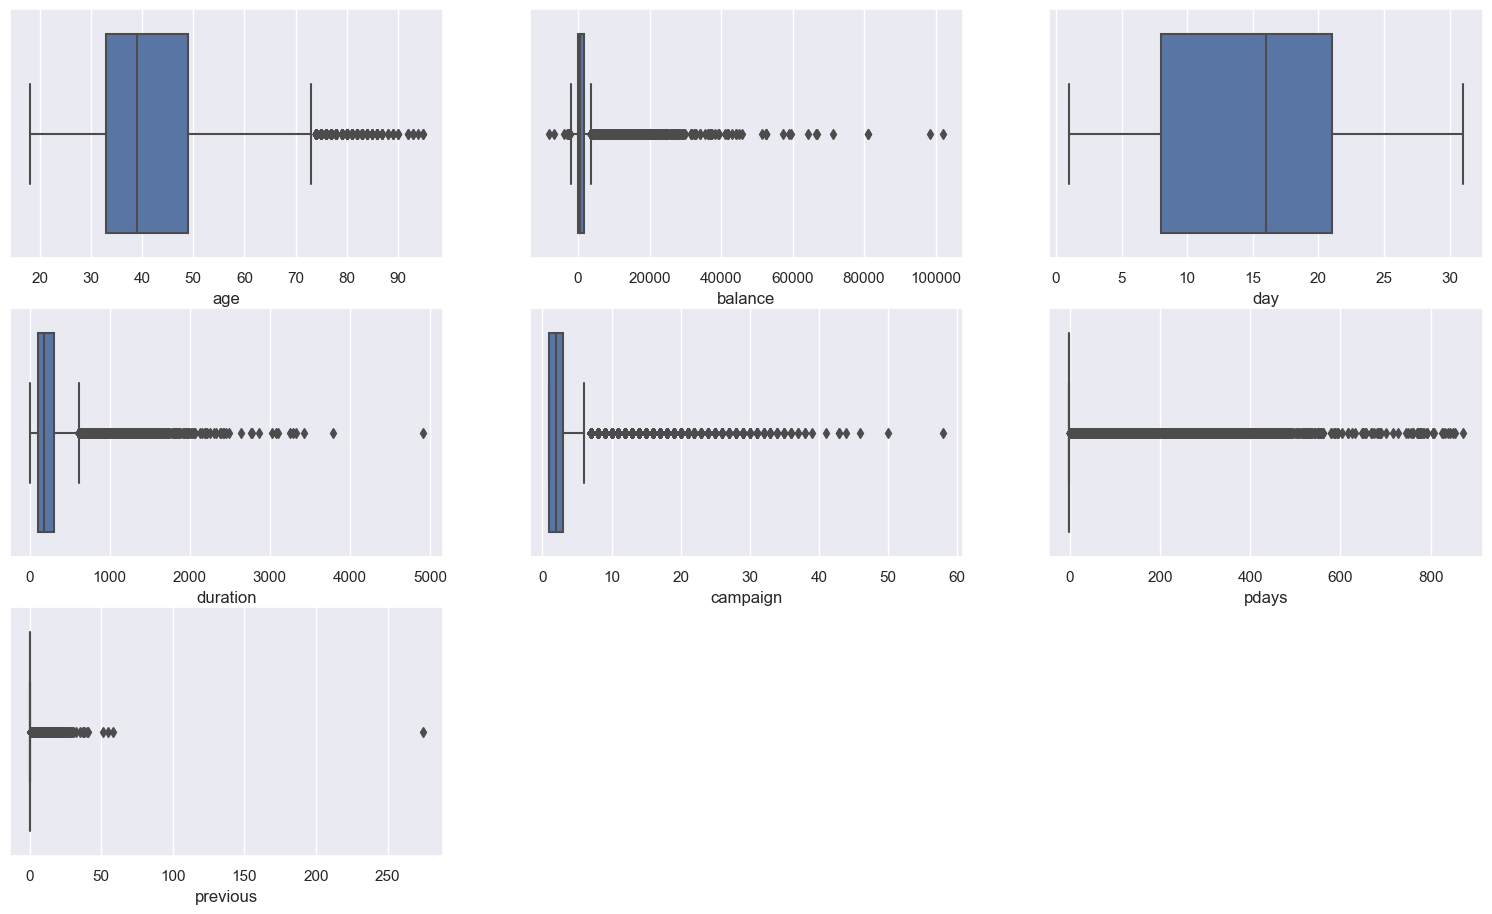

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

features = df_train.describe().columns
sns.set()
fig = plt.figure(figsize=(19, 11))
for i in range(1,len(features)+1):
    plt.subplot(3,3,i)
    sns.boxplot(x=df_train[features[i-1]], data=df_train)
plt.show()

#### obvious outlier in "previous" likely an erroneous entry; need more information to decide how to deal with it
* "previous" is the number of contacts performed before this campaign and for this client (numeric)
* unlikely contacted > 250 times, about 4x that of the next highest value
* we look at correlation of "previous" with outcome

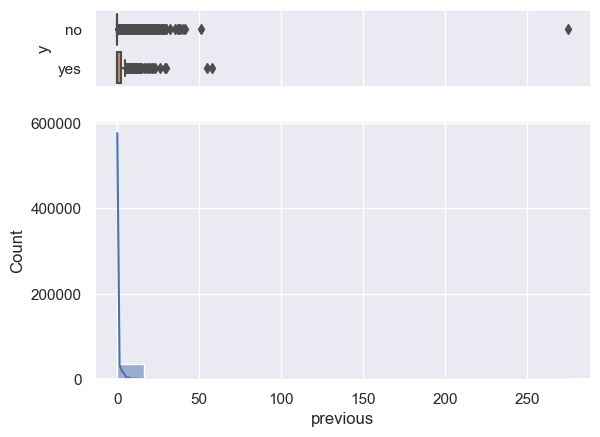

In [7]:
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw= {"height_ratios": (0.3, 1)})
sns.set(rc={'figure.figsize':(11,5)}, font_scale=1.5, style='whitegrid')

previous = sns.boxplot(data=df_train, x="previous", y="y", ax=ax_box, order = df_train["y"].value_counts().index)

sns.histplot(data=df_train, x="previous", ax=ax_hist, kde=True)

ax_box.set(xlabel='')
plt.show()

#### We proceed to drop the outlier
* identify index
* drop

In [8]:
#### identify outlier
df_train['previous'].nlargest(1)

23974    275
Name: previous, dtype: int64

In [9]:
df_train_drop = df_train[df_train.previous != 275]
df_train_drop.describe()

,age,balance,day,duration,campaign,pdays,previous
count,36168.000000,36168.000000,36168.000000,36168.000000,36168.000000,36168.000000,36168.000000
mean,41.297086,1444.116567,15.517529,243.386447,2.801040,50.491152,0.717817
std,10.898368,3168.746786,8.251656,238.632378,3.150629,109.548670,2.108840
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,82.000000,8.000000,99.000000,1.000000,-1.000000,0.000000
50%,39.000000,485.000000,16.000000,173.000000,2.000000,-1.000000,0.000000
75%,49.000000,1533.000000,21.000000,304.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,58.000000,871.000000,58.000000


#### we next look at unique data points to perform one-hot-encoding

In [10]:
#This cell aims to look at each data column and their unique datapoints#
for header in df_train.columns:
  print("TRAIN:", header, 
#         sorted(df_train[header].unique()), 
#         "Number of unique data: ", 
        len(df_train[header].unique()))

  print("TEST:", header, 
#         sorted(df_test[header].unique()), 
#         "Number of unique data: ", 
        len(df_test[header].unique()), "\n")
    

TRAIN: age 77
TEST: age 42 

TRAIN: job 12
TEST: job 12 

TRAIN: marital 3
TEST: marital 3 

TRAIN: education 4
TEST: education 4 

TRAIN: default 2
TEST: default 2 

TRAIN: balance 6700
TEST: balance 3308 

TRAIN: housing 2
TEST: housing 2 

TRAIN: loan 2
TEST: loan 2 

TRAIN: contact 3
TEST: contact 3 

TRAIN: day 31
TEST: day 31 

TRAIN: month 12
TEST: month 4 

TRAIN: duration 1414
TEST: duration 1271 

TRAIN: campaign 45
TEST: campaign 36 

TRAIN: pdays 559
TEST: pdays 1 

TRAIN: previous 41
TEST: previous 1 

TRAIN: poutcome 4
TEST: poutcome 1 

TRAIN: y 2
TEST: y 2 



#### nominal features to be one-hot encoded
* list_col_one_hot = ['job','education','default','housing','loan','contact','month','marital','poutcome','y']

#### the rest are ordinal features
* list_col_ordinal = ['age', 'day', 'duration', 'campaign', 'balance','pdays','previous']

In [2]:
list_col_one_hot = ['job','education','default','housing','loan','contact','month','marital','poutcome','y']
list_col_ordinal = ['age', 'day', 'duration', 'campaign', 'balance','pdays','previous']

# reduced dataset with top5 importance features: 'duration', 'balance', 'age', 'day', 'poutcome'
list_col_one_hot_top5 = ['poutcome','y']
list_col_ordinal_top5 = ['age', 'day', 'duration', 'balance']


In [3]:
#Do one-hot encoding with pd.get_dummies, 
# due to difference in number of categories for 'month', to concatenate the two dataframes, 
# perform one-hot then separate them out again.
dframes = [df_train, df_test]
df_concat = pd.concat(dframes)
df_concat[36167:36175]
#df_concat, index runs from 0-36168 for train dataset, then from 0-9041 for test dataset#

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
36167,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no
36168,37,entrepreneur,married,secondary,no,2971,no,no,cellular,17,nov,361,2,188,11,other,no
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes
5,42,management,single,tertiary,no,0,yes,yes,unknown,5,may,562,2,-1,0,unknown,yes


In [4]:
df_out = df_concat
for col in list_col_one_hot:
  oh_df = pd.get_dummies(df_concat[col], prefix="oh_"+ col)
  dframes = [df_out, oh_df]
  df_out = pd.concat(dframes,axis=1)  
  del df_out[col]
df_out[36167:36175]

,age,balance,day,duration,campaign,pdays,previous,oh_job_admin.,oh_job_blue-collar,oh_job_entrepreneur,...,oh_month_sep,oh_marital_divorced,oh_marital_married,oh_marital_single,oh_poutcome_failure,oh_poutcome_other,oh_poutcome_success,oh_poutcome_unknown,oh_y_no,oh_y_yes
36167,57,668,17,508,4,-1,0,0,1,0,...,0,0,1,0,0,0,0,1,1,0
36168,37,2971,17,361,2,188,11,0,0,1,...,0,0,1,0,0,1,0,0,1,0
0,59,2343,5,1042,1,-1,0,1,0,0,...,0,0,1,0,0,0,0,1,0,1
1,56,45,5,1467,1,-1,0,1,0,0,...,0,0,1,0,0,0,0,1,0,1
2,41,1270,5,1389,1,-1,0,0,0,0,...,0,0,1,0,0,0,0,1,0,1
3,55,2476,5,579,1,-1,0,0,0,0,...,0,0,1,0,0,0,0,1,0,1
4,54,184,5,673,2,-1,0,1,0,0,...,0,0,1,0,0,0,0,1,0,1
5,42,0,5,562,2,-1,0,0,0,0,...,0,0,0,1,0,0,0,1,0,1


In [5]:
#expaned from 17 to 53 columns, verify:#
col_sum = 0
for col in list_col_one_hot:
  col_sum+=len(df_concat[col].unique())
col_sum += len(list_col_ordinal)
col_sum

53

In [6]:
#2 splits on df_out: split by index into train and test, then split into input x vs target output y#
df_proc_train = df_out[0:36168]
df_proc_train.head()

,age,balance,day,duration,campaign,pdays,previous,oh_job_admin.,oh_job_blue-collar,oh_job_entrepreneur,...,oh_month_sep,oh_marital_divorced,oh_marital_married,oh_marital_single,oh_poutcome_failure,oh_poutcome_other,oh_poutcome_success,oh_poutcome_unknown,oh_y_no,oh_y_yes
0,53,988,20,1408,5,-1,0,0,0,0,...,0,0,1,0,0,0,0,1,0,1
1,32,116,20,718,2,-1,0,0,0,0,...,0,0,0,1,0,0,0,1,0,1
2,60,1614,20,921,6,-1,0,1,0,0,...,0,0,1,0,0,0,0,1,0,1
3,33,163,20,627,2,-1,0,0,0,0,...,0,0,0,1,0,0,0,1,0,1
4,37,247,20,625,6,-1,0,0,0,0,...,0,0,1,0,0,0,0,1,0,1


In [15]:
# reduced train dataset
df_proc_train_top5 = df_proc_train[['age','balance','day','duration',
                                   'oh_poutcome_failure','oh_poutcome_other','oh_poutcome_success','oh_poutcome_unknown',
                                   'oh_y_no','oh_y_yes']]
df_proc_train_top5

,age,balance,day,duration,oh_poutcome_failure,oh_poutcome_other,oh_poutcome_success,oh_poutcome_unknown,oh_y_no,oh_y_yes
0,53,988,20,1408,0,0,0,1,0,1
1,32,116,20,718,0,0,0,1,0,1
2,60,1614,20,921,0,0,0,1,0,1
3,33,163,20,627,0,0,0,1,0,1
4,37,247,20,625,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...
36163,25,199,16,173,1,0,0,0,1,0
36164,59,138,16,162,1,0,0,0,1,0
36165,37,1428,16,333,0,0,0,1,1,0
36166,34,1475,16,1166,0,1,0,0,1,0


In [10]:
df_proc_test = df_out[36169:]
df_proc_test

,age,balance,day,duration,campaign,pdays,previous,oh_job_admin.,oh_job_blue-collar,oh_job_entrepreneur,...,oh_month_sep,oh_marital_divorced,oh_marital_married,oh_marital_single,oh_poutcome_failure,oh_poutcome_other,oh_poutcome_success,oh_poutcome_unknown,oh_y_no,oh_y_yes
0,59,2343,5,1042,1,-1,0,1,0,0,...,0,0,1,0,0,0,0,1,0,1
1,56,45,5,1467,1,-1,0,1,0,0,...,0,0,1,0,0,0,0,1,0,1
2,41,1270,5,1389,1,-1,0,0,0,0,...,0,0,1,0,0,0,0,1,0,1
3,55,2476,5,579,1,-1,0,0,0,0,...,0,0,1,0,0,0,0,1,0,1
4,54,184,5,673,2,-1,0,1,0,0,...,0,0,1,0,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9037,39,-295,2,288,1,-1,0,0,0,0,...,0,0,1,0,0,0,0,1,1,0
9038,53,6525,2,73,3,-1,0,0,0,0,...,0,0,1,0,0,0,0,1,1,0
9039,30,171,2,230,4,-1,0,0,1,0,...,0,0,1,0,0,0,0,1,1,0
9040,28,-511,2,82,1,-1,0,0,1,0,...,0,0,1,0,0,0,0,1,1,0


In [11]:
df_proc_test_top5 = df_proc_test[['age','balance','day','duration',
                                   'oh_poutcome_failure','oh_poutcome_other','oh_poutcome_success','oh_poutcome_unknown',
                                   'oh_y_no','oh_y_yes']]
df_proc_test_top5

,age,balance,day,duration,oh_poutcome_failure,oh_poutcome_other,oh_poutcome_success,oh_poutcome_unknown,oh_y_no,oh_y_yes
0,59,2343,5,1042,0,0,0,1,0,1
1,56,45,5,1467,0,0,0,1,0,1
2,41,1270,5,1389,0,0,0,1,0,1
3,55,2476,5,579,0,0,0,1,0,1
4,54,184,5,673,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...
9037,39,-295,2,288,0,0,0,1,1,0
9038,53,6525,2,73,0,0,0,1,1,0
9039,30,171,2,230,0,0,0,1,1,0
9040,28,-511,2,82,0,0,0,1,1,0


In [12]:
def getXY(dataF):
  return dataF.loc[:,"age":"oh_poutcome_unknown"], dataF.loc[:,"oh_y_no":"oh_y_yes"]

df_x_train, df_y_train = getXY(df_proc_train)
df_x_test, df_y_test = getXY(df_proc_test)
print("TRAIN X\n",df_x_train.head(1), "Size:" ,len(df_x_train))
print()
print("TRAIN Y\n",df_y_train.head(1), "Size:" ,len(df_y_train))
print()
print("TEST X\n",df_x_test.head(1), "Size:" ,len(df_x_test))
print()
print("TEST Y\n",df_y_test.head(1), "Size:" ,len(df_y_test))

TRAIN X
    age  balance  day  duration  campaign  pdays  previous  oh_job_admin.  \
0   53      988   20      1408         5     -1         0              0   

   oh_job_blue-collar  oh_job_entrepreneur  ...  oh_month_nov  oh_month_oct  \
0                   0                    0  ...             0             0   

   oh_month_sep  oh_marital_divorced  oh_marital_married  oh_marital_single  \
0             0                    0                   1                  0   

   oh_poutcome_failure  oh_poutcome_other  oh_poutcome_success  \
0                    0                  0                    0   

   oh_poutcome_unknown  
0                    1  

[1 rows x 51 columns] Size: 36168

TRAIN Y
    oh_y_no  oh_y_yes
0        0         1 Size: 36168

TEST X
    age  balance  day  duration  campaign  pdays  previous  oh_job_admin.  \
0   59     2343    5      1042         1     -1         0              1   

   oh_job_blue-collar  oh_job_entrepreneur  ...  oh_month_nov  oh_month_oct 

In [16]:
# repeat for reduced dataset
def getXY(dataF):
  return dataF.loc[:,"age":"oh_poutcome_unknown"], dataF.loc[:,"oh_y_no":"oh_y_yes"]

df_x_train_top5, df_y_train_top5 = getXY(df_proc_train_top5)
df_x_test_top5, df_y_test_top5 = getXY(df_proc_test_top5)
print("TRAIN X\n",df_x_train_top5.head(1), "Size:" ,len(df_x_train_top5))
print()
print("TRAIN Y\n",df_y_train_top5.head(1), "Size:" ,len(df_y_train_top5))
print()
print("TEST X\n",df_x_test_top5.head(1), "Size:" ,len(df_x_test_top5))
print()
print("TEST Y\n",df_y_test_top5.head(1), "Size:" ,len(df_y_test_top5))

TRAIN X
    age  balance  day  duration  oh_poutcome_failure  oh_poutcome_other  \
0   53      988   20      1408                    0                  0   

   oh_poutcome_success  oh_poutcome_unknown  
0                    0                    1   Size: 36168

TRAIN Y
    oh_y_no  oh_y_yes
0        0         1 Size: 36168

TEST X
    age  balance  day  duration  oh_poutcome_failure  oh_poutcome_other  \
0   59     2343    5      1042                    0                  0   

   oh_poutcome_success  oh_poutcome_unknown  
0                    0                    1   Size: 9042

TEST Y
    oh_y_no  oh_y_yes
0        0         1 Size: 9042


#### save processed data as csv to be used by various models
* so we do not need to re-load/process from train/test data

In [13]:
df_x_train.to_csv('./trainX.csv', index=False)
df_y_train.to_csv('./trainY.csv', index=False)
df_x_test.to_csv('./testX.csv', index=False)
df_y_test.to_csv('./testY.csv', index=False)

In [17]:
df_x_train_top5.to_csv('./trainX_top5.csv', index=False)
df_y_train_top5.to_csv('./trainY_top5.csv', index=False)
df_x_test_top5.to_csv('./testX_top5.csv', index=False)
df_y_test_top5.to_csv('./testY_top5.csv', index=False)